In [73]:
import inspect

def my_function():
    frame = inspect.currentframe()
    caller_frame = frame.f_back

    if caller_frame is not None and caller_frame.f_code.co_name == my_function.__name__:
        print("Called by itself")
    else:
        print("Called by another function")
        my_function()
# Call the function
#my_function()  # Output: Called by another function

# Call the function recursively
my_function()  # Output: Called by itself


Called by another function
Called by itself


Nothing done.


c:\Users\Ephraim\GitHub\Finite-Difference\FD.py:713: Warning: Overriding values
  


Finite approximation: f' = [-f(x-0.5h) + f(x+0.5h)] / [h^1]
Finite approximation: f' = [-f(x-0.5h) + f(x+0.5h)] / [h^1]


interactive(children=(Dropdown(description='Field', options=('u dot', 'u', 'v dot', 'v', 'eta dot', 'eta'), va…

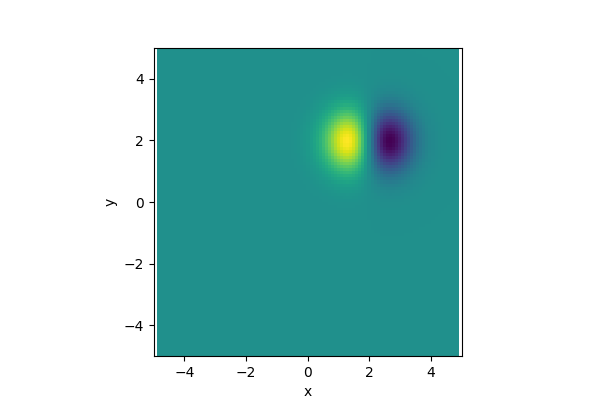

In [93]:
import FD as FD

import numpy as np

import imp
imp.reload(FD)
%reset



m = FD.Model(
    {"x":np.linspace(-5,5,100),
     "y":np.linspace(-5,5,100),
     "t":range(0,200)},
     periodic=["y"],
     time_axis="t"
)


u = FD.Field(m,"u",edge_axes="x",n_time_ders=1)
v = FD.Field(m,"v",edge_axes="y",n_time_ders=1)

eta = FD.Field(m,"eta",n_time_ders=1)


u.set_BC("0","x","start")
u.set_BC("0","x","end")

#u.set_BC("0","y","start")
#u.set_BC("0","y","end")


eta.set_IC("exp(-(x-2)**2-(y-2)**2)")
u.set_IC("0")
v.set_IC("0")

#dudx = Field(m)
#dudy = Field(m)

c_e = FD.Stencil([-1/2,1/2],1,axis_type="cell",der_axis_type="edge")
e_c = FD.Stencil([-1/2,1/2],1,axis_type="edge",der_axis_type="cell")


cx = .1
cy = .1

g = .1
h = 1

while not m.finished:
    detadx = c_e.der(eta.prev,"x") # required to write u.prev

    detady = c_e.der(eta.prev,"y")

    u.dot.assign_update(g*detadx)

    v.dot.assign_update(g*detady)

    u.time_integrate_update()
    v.time_integrate_update()

    dudx = e_c.der(u.new,"x")
    dvdy = e_c.der(v.new,"y")

    eta.dot.assign_update(h*dudx+h*dvdy)


    eta.time_integrate_update()

    m.increment_time()

m.interact()

